In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/BTC-USD (1).csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-21,7352.720215,7437.640137,7262.410156,7419.290039,7419.290039,3.726610e+09
1,2018-07-22,7417.799805,7537.950195,7383.819824,7418.490234,7418.490234,3.695460e+09
2,2018-07-23,7414.709961,7771.500000,7409.100098,7711.109863,7711.109863,5.132480e+09
3,2018-07-24,7716.509766,8424.269531,7705.500000,8424.269531,8424.269531,7.277690e+09
4,2018-07-25,8379.660156,8416.870117,8086.359863,8181.390137,8181.390137,5.845400e+09


In [ ]:
df=df.dropna()

In [ ]:
print(int(len(df)*0.9))
df= df.drop(['Date', 'Adj Close'], axis = 1)
n_rows = int(len(df)*0.9)
train = df[:n_rows]
test = df[n_rows:]
print(len(train))
#train.shape
print(len(test))
train

1643
1643
183


,Open,High,Low,Close,Volume
0,7352.720215,7437.640137,7262.410156,7419.290039,3.726610e+09
1,7417.799805,7537.950195,7383.819824,7418.490234,3.695460e+09
2,7414.709961,7771.500000,7409.100098,7711.109863,5.132480e+09
3,7716.509766,8424.269531,7705.500000,8424.269531,7.277690e+09
4,8379.660156,8416.870117,8086.359863,8181.390137,5.845400e+09
...,...,...,...,...,...
1638,19910.537109,21075.142578,19907.828125,20976.298828,3.896778e+10
1639,20977.484375,20993.748047,20606.986328,20880.798828,1.929841e+10
1640,20882.224609,21360.875000,20715.746094,21169.632813,2.679249e+10
1641,21175.833984,21438.660156,20978.533203,21161.519531,2.499998e+10


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow.keras.layers import Dense,Dropout,LSTM
from tensorflow.keras.models import Sequential

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scale_data = scaler.fit_transform(train.values.reshape(-1, 1))
scale_data

array([[1.18569712e-08],
       [1.20989304e-08],
       [1.15996541e-08],
       ...,
       [4.94354030e-08],
       [4.98549180e-08],
       [8.54939126e-02]])

In [ ]:
scale_data.shape

(8215, 1)

In [ ]:
#prep of training data
x_tr = []
y_tr = []
for i in range(60,scale_data.shape[0]):
  x_tr.append(scale_data[i-60:i]) #60 for test
  y_tr.append(scale_data[i,0])

x_tr , y_tr = np.array(x_tr), np.array(y_tr)
y_tr.shape

(8155,)

In [ ]:
x_tr.shape

(8155, 60, 1)

In [ ]:
x_tr.shape[1]

60

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization

regressor = Sequential()

regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_tr.shape[1], x_tr.shape[2])))
regressor.add(BatchNormalization())
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(BatchNormalization())
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(BatchNormalization())
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=120, activation='relu'))
regressor.add(BatchNormalization())
regressor.add(Dropout(0.5))

regressor.add(Dense(units=1))
regressor.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 60, 50)            10400     
                                                                 
 batch_normalization_16 (Bat  (None, 60, 50)           200       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 60, 60)            26640     
                                                                 
 batch_normalization_17 (Bat  (None, 60, 60)           240       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 60, 60)           

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_tr, y_tr, epochs = 5, batch_size =50)

Epoch 1/5
164/164 [==============================] - 45s 232ms/step - loss: 0.4806
Epoch 2/5
164/164 [==============================] - 38s 231ms/step - loss: 0.0859
Epoch 3/5
164/164 [==============================] - 39s 239ms/step - loss: 0.0085
Epoch 4/5
164/164 [==============================] - 37s 227ms/step - loss: 0.0031
Epoch 5/5
164/164 [==============================] - 38s 230ms/step - loss: 0.0018


In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scale_test = scaler.fit_transform(test.values.reshape(-1, 1))
scale_test.shape

(915, 1)

In [ ]:
x_te = []
y_te =[]
for i in range(60,scale_test.shape[0]):
   x_te.append(scale_test[i-60:i])
   y_te.append(scale_test[i,0])

In [ ]:
x_te, y_te = np.array(x_te), np.array(y_te)
x_te.shape, y_te.shape

((855, 60, 1), (855,))

In [ ]:
y_pred = regressor.predict(x_te)


27/27 [==============================] - 3s 75ms/step


In [ ]:
scaler.scale_


array([1.8307571e-11])

In [ ]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [ ]:
y_te = y_te*scale
y_pred = y_pred*scale

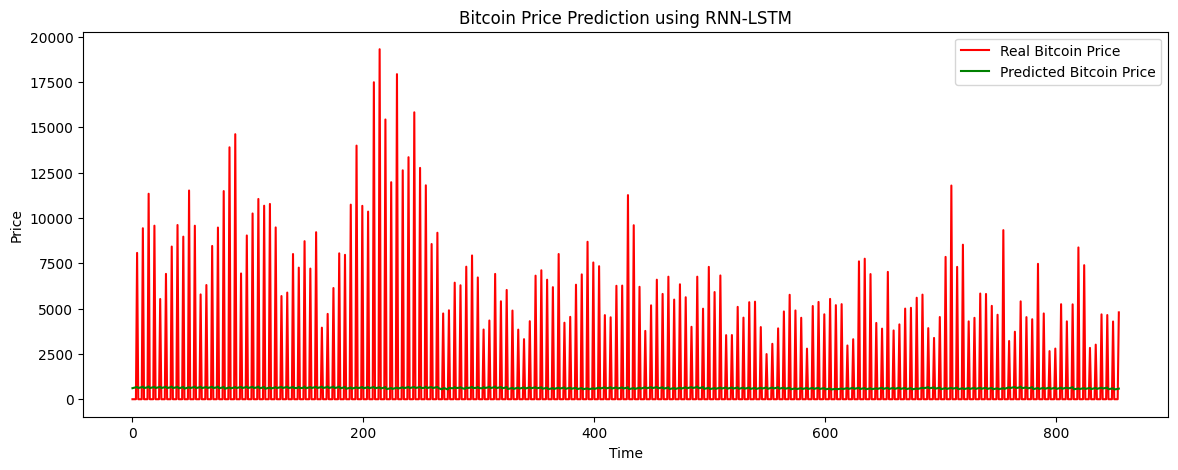

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_te, color = 'red', label = 'Real Bitcoin Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()